In [6]:
#!pip install kaggle
#!pip install config-dir

In [12]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Traceback (most recent call last):
  File "/jet/var/python/bin/kaggle", line 7, in <module>
    from kaggle.cli import main
  File "/jet/var/python/lib/python3.6/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/jet/var/python/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 152, in authenticate
    self._load_config(config_data)
  File "/jet/var/python/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 193, in _load_config
    raise ValueError('Error: Missing %s in configuration.' % item)
ValueError: Error: Missing username in configuration.


In [1]:
import os
import json
import kaggle.api
import zipfile # to extract data from zip archive
from sklearn.model_selection import StratifiedShuffleSplit

from fastai.vision.all import *
import pandas as pd

from fastai.tabular.all import *

import torch

/jet/var/python/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

Links: https://github.com/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/Tabular%20Notebooks/01_Adults.ipynb
Rossman prediciton with fastai https://github.com/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/Tabular%20Notebooks/02_Regression_and_Permutation_Importance.ipynb

### Load data

#### from kaggle

In [13]:
!mkdir /jet/prs/workspace/Kaggle_Leaf_Classification/.kaggle
# create the file kaggle.json in the folder
!touch /jet/prs/workspace/Kaggle_Leaf_Classification/.kaggle/kaggle.json
# restrict the access to the file in kaggle folder
!chmod 600 /jet/prs/workspace/Kaggle_Leaf_Classification/.kaggle/kaggle.json

api_token = {"username":"fornitroll","key":"f89ce16bfe131d4f027f39748aac27ed"}
with open('/jet/prs/workspace/Kaggle_Leaf_Classification/kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [3]:
!kaggle competitions download -c leaf-classification

 96%|████████████████████████████████████▌ | 33.0M/34.3M [00:01<00:00, 26.4MB/s]
100%|██████████████████████████████████████| 34.3M/34.3M [00:01<00:00, 28.5MB/s]


Traceback (most recent call last):
  File "/jet/var/python/bin/kaggle", line 7, in <module>
    from kaggle.cli import main
  File "/jet/var/python/lib/python3.6/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/jet/var/python/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /home/jet/.kaggle. Or use the environment method.


In [4]:
# extract files
zipfile.ZipFile('leaf-classification.zip').extractall(path = "/jet/prs/workspace/Kaggle_Leaf_Classification/kaggle")
path = Path('kaggle')

OSError: Could not find kaggle.json. Make sure it's located in /home/jet/.kaggle. Or use the environment method.

In [ ]:
# extact files
for i in path.ls():
    if '.zip' in i.suffix:
        name = i.stem[:-4]
        path = "/jet/prs/workspace/Kaggle_Leaf_Classification/kaggle/data"
        zipfile.ZipFile(i).extractall(path = path)

#### if data has been already downloaded

In [3]:
path = Path('/jet/prs/workspace/Kaggle_Leaf_Classification/kaggle/data')

In [4]:
df_train = pd.read_csv(path/'train.csv')

In [5]:
df_train.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


In [6]:
len(df_train.species.unique()), len(df_train)

(99, 990)

In [7]:
# check that there is 10 img per class
for i in df_train.species.unique():
    if len(df_train[df_train.species==i])!=10:
        print('for class {} there is not 10'.format(i))
        break

In [13]:
# split the data
TEST_SIZE=0.2

df_train['is_valid']=int(0)
sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=0)
for train_index, test_index in sss.split(df_train.id.values, df_train.species.values): 
    df_train['is_valid'].iloc[test_index]=int(1)

In [14]:
# show that the numberr of validation samples as we prescribed above
df_train[['id', 'species','is_valid']][df_train.species==i]

,id,species,is_valid
412,676,Sorbus_Aria,0
435,714,Sorbus_Aria,0
452,741,Sorbus_Aria,0
491,798,Sorbus_Aria,0
541,867,Sorbus_Aria,1
721,1160,Sorbus_Aria,0
734,1176,Sorbus_Aria,1
745,1200,Sorbus_Aria,0
790,1269,Sorbus_Aria,0
872,1395,Sorbus_Aria,0


In [15]:
path

Path('/jet/prs/workspace/Kaggle_Leaf_Classification/kaggle/data')

In [16]:
def get_x(r): return path/'images'/(str(r['id'])+('.jpg'))
def get_y(r): return r['species']

In [17]:
# splits is based on the value in the is_valid column
cond = df_train.is_valid==0
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

## Transfer learning (resnet18)

### DataBlock

In [64]:
# compose a DataBlock
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), # cls=PILImageBW -- make a one chanal picture-tensor
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(64, ResizeMethod.Squish),
                   splitter = splits #ColSplitter(col = 'is_valid'),
                    #batch_tfms = RandomResizedCrop(28, min_scale=0.8)
                  )
#dls = dblock.dataloaders(df_train)

In [61]:
dblock.datasets(df_train)

(#990) [(PILImageBW mode=L size=526x467, TensorCategory(3)),(PILImageBW mode=L size=667x251, TensorCategory(49)),(PILImageBW mode=L size=691x456, TensorCategory(65)),(PILImageBW mode=L size=505x466, TensorCategory(94)),(PILImageBW mode=L size=771x331, TensorCategory(84)),(PILImageBW mode=L size=825x449, TensorCategory(40)),(PILImageBW mode=L size=858x363, TensorCategory(54)),(PILImageBW mode=L size=938x766, TensorCategory(78)),(PILImageBW mode=L size=726x324, TensorCategory(53)),(PILImageBW mode=L size=1101x275, TensorCategory(89))...]

In [60]:
??DataBlock

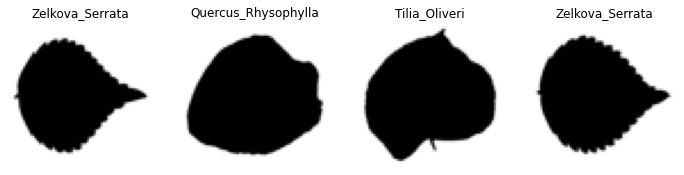

In [39]:
dls.show_batch(nrows=1, ncols=4)

In [40]:
xb,yb = first(dls.valid)
xb.shape

torch.Size([64, 1, 64, 64])

### Model

In [65]:
learn = cnn_learner(dls, resnet18, pretrained=True, metrics=error_rate)

In [66]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,6.198908,4.727303,0.942761,00:04


epoch,train_loss,valid_loss,error_rate,time
0,4.318278,3.948952,0.875421,00:06
1,3.442172,3.061247,0.690236,00:06
2,2.653907,2.315929,0.528620,00:06
3,2.069474,1.718117,0.390572,00:06
4,1.691007,1.436877,0.323232,00:06


SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=2.2908675418875646e-06)

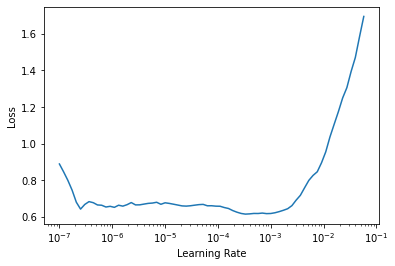

In [43]:
learn.lr_find()

In [68]:
learn.fine_tune(5, lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.513608,1.153535,0.296296,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.428372,1.099124,0.252525,00:06
1,0.370203,1.016684,0.235690,00:06
2,0.303974,0.894478,0.222222,00:06
3,0.259054,0.844130,0.208754,00:06
4,0.229852,0.835003,0.212121,00:06


### Transfer learning with data augmentation

In [41]:
# compose a DataBlock
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), # cls=PILImageBW -- make a one chanal picture-tensor
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(32, ResizeMethod.Squish),
                   batch_tfms=aug_transforms(),
                   splitter = ColSplitter(col = 'is_valid'),
                   #batch_tfms = RandomResizedCrop(28, min_scale=0.8)
                  )
dls = dblock.dataloaders(df_train)

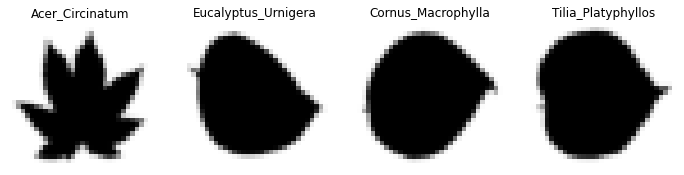

In [42]:
dls.show_batch(nrows=1, ncols=4)

In [20]:
learn = cnn_learner(dls, resnet18, pretrained=True, metrics=error_rate)

In [21]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,6.361978,4.810787,0.992424,00:02


epoch,train_loss,valid_loss,error_rate,time
0,5.585581,4.683559,0.979798,00:04
1,5.267330,4.442887,0.929293,00:04
2,4.950541,4.063559,0.858586,00:04
3,4.668368,3.783514,0.820707,00:04
4,4.467056,3.472573,0.772727,00:04


In [22]:
learn.fine_tune(10, lr=1e-4) # last 5 are shown below

epoch,train_loss,valid_loss,error_rate,time
0,3.988173,3.192289,0.719697,00:03


epoch,train_loss,valid_loss,error_rate,time
0,3.813508,3.073729,0.717172,00:04
1,3.750474,2.947084,0.681818,00:05
2,3.636482,2.826129,0.648990,00:05
3,3.542924,2.803723,0.646465,00:04
4,3.422848,2.636161,0.628788,00:04
5,3.276450,2.498135,0.636364,00:04
6,3.144029,2.413733,0.603535,00:04
7,3.077466,2.374997,0.593434,00:04
8,2.977452,2.324832,0.598485,00:04
9,2.915183,2.327786,0.588384,00:04


### Transfer learning with data augmentation and RandomSizedCrop due to large overfitting

In [24]:
# compose a DataBlock
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), # cls=PILImageBW -- make a one chanal picture-tensor
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(64, ResizeMethod.Squish),
                   batch_tfms=[*aug_transforms(mult=2), RandomResizedCrop(40, min_scale=0.8)],
                   splitter = ColSplitter(col = 'is_valid'),
                   #batch_tfms = RandomResizedCrop(40, min_scale=0.8)
                  )
dls = dblock.dataloaders(df_train)

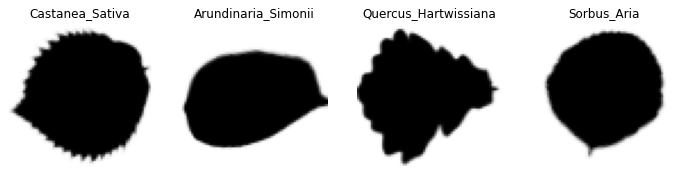

In [25]:
dls.show_batch(nrows=1, ncols=4)

In [26]:
learn = cnn_learner(dls, resnet18, pretrained=True, metrics=error_rate)

In [27]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,6.196091,4.832691,0.984848,00:04


epoch,train_loss,valid_loss,error_rate,time
0,5.687165,4.327053,0.939394,00:06
1,5.445471,3.771499,0.845960,00:06
2,5.043727,3.171341,0.750000,00:06
3,4.764478,2.712932,0.654040,00:06
4,4.525004,2.559082,0.633838,00:06


In [28]:
learn.fine_tune(10, lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,4.075683,2.394205,0.578283,00:05


epoch,train_loss,valid_loss,error_rate,time
0,3.584157,2.316942,0.555556,00:06
1,3.537575,2.156519,0.525253,00:06
2,3.394565,1.917395,0.479798,00:06
3,3.225854,1.653930,0.434343,00:06
4,3.074419,1.539464,0.409091,00:06
5,2.971551,1.493241,0.426768,00:06
6,2.842871,1.415655,0.404040,00:06
7,2.743823,1.365437,0.393939,00:06
8,2.654952,1.341943,0.396465,00:06
9,2.566631,1.342736,0.381313,00:06


## Tabular NN Model
tabular_learner(dls, metrics=accuracy, cbs=[ShowGraphCallback()]) # if layers is None: layers = [200,100], ReLU after each layer
### DataBlock

In [86]:
# compose a DataBlock
# ??TabularPandas

In [116]:
df_tt = df_train.copy()

In [117]:
df_tt.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,is_valid
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391,0
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461,0
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930,0
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852,0
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250,0


In [118]:
# same as above
cond = df_tt.is_valid==0
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [119]:
df_tt.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture56', 'texture57', 'texture58', 'texture59', 'texture60',
       'texture61', 'texture62', 'texture63', 'texture64', 'is_valid'],
      dtype='object', length=195)

In [120]:
#df_tt.drop(['id'], axis=1, inplace=True)
cont_names = list(df_tt.columns[2:-1])
cat_names = None

In [121]:
# decode species

In [122]:
to = TabularPandas(df_tt, y_names="species",
    cat_names = cat_names,
    cont_names = cont_names,
    #procs = Normalize,
    y_block = CategoryBlock(), 
    splits = splits,
    )
# in dls the element number (or id column also) is the same as in first df_tt dataset, so we can make a decoder
# for predicted numerical class to 

In [77]:
??dls.decode

In [78]:
??to.decode_col

Object `to.decode_col` not found.


In [34]:
to.decode_row(to.items.iloc[0])

id                     1
species      Acer_Opalus
margin1         0.007812
margin2         0.023438
margin3         0.023438
                ...     
texture61              0
texture62       0.004883
texture63              0
texture64       0.025391
is_valid               0
Name: 0, Length: 195, dtype: object

In [187]:
??to.procs.decode

In [35]:
sum(to.valid.iloc[:]['is_valid']==1)

198

In [123]:
dls = to.dataloaders()

In [124]:
dls.valid.xs

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
5,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.000000,0.003906,0.027344,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.000000,0.0,0.000000,0.001953,0.013672
11,0.001953,0.001953,0.023438,0.025391,0.076172,0.000000,0.029297,0.000000,0.005859,0.015625,...,0.013672,0.003906,0.014648,0.003906,0.036133,0.000000,0.0,0.012695,0.005859,0.000000
15,0.027344,0.025391,0.066406,0.007812,0.003906,0.052734,0.031250,0.000000,0.003906,0.039062,...,0.008789,0.000000,0.004883,0.004883,0.009766,0.001953,0.0,0.003906,0.000000,0.036133
21,0.019531,0.029297,0.080078,0.033203,0.025391,0.023438,0.009766,0.005859,0.000000,0.009766,...,0.021484,0.000000,0.057617,0.000000,0.002930,0.000000,0.0,0.000000,0.000000,0.035156
22,0.000000,0.005859,0.023438,0.001953,0.013672,0.001953,0.015625,0.000000,0.003906,0.007812,...,0.000000,0.019531,0.000000,0.031250,0.005859,0.054688,0.0,0.103520,0.000977,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0.001953,0.000000,0.041016,0.015625,0.015625,0.000000,0.009766,0.000000,0.003906,0.017578,...,0.000000,0.000000,0.017578,0.011719,0.070312,0.000000,0.0,0.000977,0.000000,0.012695
978,0.000000,0.000000,0.007812,0.007812,0.039062,0.000000,0.001953,0.005859,0.000000,0.003906,...,0.000000,0.056641,0.000000,0.035156,0.011719,0.024414,0.0,0.066406,0.013672,0.000000
979,0.009766,0.003906,0.025391,0.017578,0.005859,0.003906,0.035156,0.000000,0.000000,0.033203,...,0.000000,0.000000,0.000000,0.008789,0.016602,0.000000,0.0,0.024414,0.037109,0.003906
981,0.027344,0.044922,0.023438,0.017578,0.001953,0.025391,0.083984,0.000000,0.000000,0.074219,...,0.000000,0.000000,0.000000,0.036133,0.082031,0.000000,0.0,0.026367,0.008789,0.000000


In [41]:
??FillMissing

In [100]:
??tabular_learner

In [101]:
??TabularModel

In [174]:
#learn = tabular_learner(dls, layers=[1000,500], metrics=accuracy, embed_p=0.04, ps=[0.001,0.1])

learn = tabular_learner(dls, metrics=error_rate) # if layers is None: layers = [200,100], ReLU after each layer (default)

In [175]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=192, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=99, bias=True)
    )
  )
)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.015848932787775993)

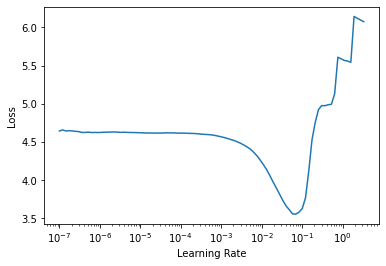

In [156]:
learn.lr_find()

In [157]:
learn.fit_one_cycle(10,lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,4.596172,4.597099,0.989899,00:00
1,4.465029,4.585736,0.989899,00:00
2,4.199054,4.512604,0.954545,00:00
3,3.825448,4.266103,0.808081,00:00
4,3.387183,3.695434,0.505050,00:00
5,2.938494,2.897835,0.257576,00:00
6,2.529872,2.179207,0.176768,00:00
7,2.183120,1.671288,0.101010,00:00
8,1.907915,1.368894,0.060606,00:00
9,1.697374,1.240252,0.045455,00:00


In [158]:
learn.validate()

(#2) [1.2402516603469849,0.04545454680919647]

In [176]:
learn.summary()

TabularModel (Input shape: ['64 x 0', '64 x 192'])
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm1d          64 x 192             384        True      
________________________________________________________________
BatchNorm1d          64 x 192             384        True      
________________________________________________________________
Linear               64 x 200             38,400     True      
________________________________________________________________
ReLU                 64 x 100             0          False     
________________________________________________________________
BatchNorm1d          64 x 200             400        True      
________________________________________________________________
Linear               64 x 100             20,000     True      
________________________________________________________________
ReLU                 64 x 100             0          False     
_______________________________________________

In [171]:
sort_by_run(learn.cbs)

(#3) [TrainEvalCallback,Recorder,ProgressCallback]

In [255]:
# ??ClassificationInterpretation
# ??interp.vocab

In [46]:
len(learn.get_preds()), learn.get_preds()[0].shape, learn.get_preds()[1].shape

(2, torch.Size([198, 99]), torch.Size([198, 1]))

In [47]:
interp = ClassificationInterpretation.from_learner(learn)

In [48]:
# show the class to index interpretation
interp.vocab.o2i

{'Acer_Capillipes': 0,
 'Acer_Circinatum': 1,
 'Acer_Mono': 2,
 'Acer_Opalus': 3,
 'Acer_Palmatum': 4,
 'Acer_Pictum': 5,
 'Acer_Platanoids': 6,
 'Acer_Rubrum': 7,
 'Acer_Rufinerve': 8,
 'Acer_Saccharinum': 9,
 'Alnus_Cordata': 10,
 'Alnus_Maximowiczii': 11,
 'Alnus_Rubra': 12,
 'Alnus_Sieboldiana': 13,
 'Alnus_Viridis': 14,
 'Arundinaria_Simonii': 15,
 'Betula_Austrosinensis': 16,
 'Betula_Pendula': 17,
 'Callicarpa_Bodinieri': 18,
 'Castanea_Sativa': 19,
 'Celtis_Koraiensis': 20,
 'Cercis_Siliquastrum': 21,
 'Cornus_Chinensis': 22,
 'Cornus_Controversa': 23,
 'Cornus_Macrophylla': 24,
 'Cotinus_Coggygria': 25,
 'Crataegus_Monogyna': 26,
 'Cytisus_Battandieri': 27,
 'Eucalyptus_Glaucescens': 28,
 'Eucalyptus_Neglecta': 29,
 'Eucalyptus_Urnigera': 30,
 'Fagus_Sylvatica': 31,
 'Ginkgo_Biloba': 32,
 'Ilex_Aquifolium': 33,
 'Ilex_Cornuta': 34,
 'Liquidambar_Styraciflua': 35,
 'Liriodendron_Tulipifera': 36,
 'Lithocarpus_Cleistocarpus': 37,
 'Lithocarpus_Edulis': 38,
 'Magnolia_Heptapeta':

In [182]:
??interp.vocab

In [49]:
interp.vocab.map_objs(['Cornus_Chinensis'])

(#1) [22]

In [50]:
interp.print_classification_report()

                              precision    recall  f1-score   support

             Acer_Capillipes       1.00      1.00      1.00         2
             Acer_Circinatum       0.67      1.00      0.80         2
                   Acer_Mono       1.00      1.00      1.00         2
                 Acer_Opalus       0.67      1.00      0.80         2
               Acer_Palmatum       1.00      1.00      1.00         2
                 Acer_Pictum       1.00      0.50      0.67         2
             Acer_Platanoids       1.00      1.00      1.00         2
                 Acer_Rubrum       1.00      1.00      1.00         2
              Acer_Rufinerve       1.00      1.00      1.00         2
            Acer_Saccharinum       1.00      1.00      1.00         2
               Alnus_Cordata       1.00      0.50      0.67         2
          Alnus_Maximowiczii       0.00      0.00      0.00         2
                 Alnus_Rubra       1.00      1.00      1.00         2
           Alnus_Si

/jet/var/python/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
row, clas, probs = learn.predict(df_train.iloc[10])

In [52]:
row.show()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,species
0,0.019531,0.03125,0.001953,0.005859,0.003906,0.013672,0.033203,0.0,0.011719,0.042969,0.015625,0.017578,0.019531,0.009766,0.015625,0.0,0.046875,0.001953,0.025391,0.011719,0.025391,0.021484,0.0,0.029297,0.011719,0.025391,0.015625,0.011719,0.003906,0.013672,0.007812,0.001953,0.007812,0.0,0.027344,0.021484,0.001953,0.017578,0.015625,0.001953,0.001953,0.009766,0.035156,0.001953,0.007812,0.011719,0.027344,0.052734,0.003906,0.050781,0.013672,0.007812,0.060547,0.001953,0.023438,0.007812,0.009766,0.003906,0.0,0.029297,0.001953,0.033203,0.0,0.013672,0.000683,0.000729,0.000656,0.000638,0.000616,0.000596,0.000575,0.000529,0.00051,0.000464,0.000453,0.000431,0.000402,0.000414,0.000413,0.000399,0.000426,0.000395,0.000432,0.000436,0.000457,0.000499,0.000494,0.00054,0.000556,0.000613,0.000612,0.000679,0.000721,0.000791,0.000845,0.000914,0.000987,0.00099,0.000918,0.000844,0.000785,0.000713,0.000671,0.000603,0.000576,0.000577,0.00054,0.000497,0.000484,0.000427,0.000448,0.000408,0.000399,0.000386,0.000353,0.000387,0.000383,0.000401,0.000432,0.000442,0.000494,0.000528,0.000563,0.000616,0.000656,0.000692,0.000698,0.000684,0.011719,0.007812,0.00293,0.021484,0.004883,0.003906,0.054688,0.004883,0.019531,0.009766,0.014648,0.0,0.000977,0.008789,0.0,0.0,0.004883,0.0,0.083008,0.006836,0.0,0.007812,0.00293,0.0,0.001953,0.005859,0.12598,0.0,0.032227,0.004883,0.06543,0.0,0.0,0.011719,0.004883,0.0,0.000977,0.018555,0.052734,0.023438,0.029297,0.0,0.037109,0.099609,0.003906,0.003906,0.009766,0.0,0.007812,0.022461,0.0,0.0,0.003906,0.11328,0.009766,0.0,0.0,0.00293,0.024414,0.0,0.0,0.006836,0.0,0.004883,Zelkova_Serrata


In [53]:
clas, probs

(tensor(98),
 tensor([0.0010, 0.0062, 0.0092, 0.0556, 0.0032, 0.0012, 0.0072, 0.0057, 0.0032,
         0.0027, 0.0090, 0.0041, 0.0420, 0.0096, 0.0018, 0.0023, 0.0025, 0.0057,
         0.0044, 0.0032, 0.0032, 0.0086, 0.0009, 0.0051, 0.0018, 0.0021, 0.0056,
         0.0033, 0.0072, 0.0054, 0.0105, 0.0028, 0.0016, 0.0012, 0.0014, 0.0005,
         0.0023, 0.0041, 0.0022, 0.0024, 0.0038, 0.0105, 0.0012, 0.0044, 0.0011,
         0.0170, 0.0041, 0.0135, 0.0128, 0.0021, 0.0263, 0.0023, 0.0053, 0.0138,
         0.0058, 0.0126, 0.0011, 0.0010, 0.0026, 0.0011, 0.0177, 0.0017, 0.0027,
         0.0013, 0.0076, 0.0066, 0.0010, 0.0024, 0.0237, 0.0236, 0.0032, 0.0040,
         0.0019, 0.0036, 0.0024, 0.0049, 0.0103, 0.0022, 0.0008, 0.0374, 0.0051,
         0.0292, 0.0003, 0.0017, 0.0018, 0.0335, 0.0105, 0.0142, 0.0014, 0.0012,
         0.0036, 0.0067, 0.0040, 0.0092, 0.0301, 0.0007, 0.0162, 0.0051, 0.2716]))

### Apply model to the test set

In [54]:
df_test = pd.read_csv(path/'test.csv')

In [55]:
dl = learn.dls.test_dl(df_test)

In [94]:
dl = learn.dls.test_dl(df_tt)

In [95]:
dl.show_batch()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,species
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,0.000000,0.017578,0.031250,0.000000,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000577,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.000430,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000661,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,0.000000,0.007812,0.007812,0.00000,0.000000,0.047852,0.000000,0.054688,0.022461,0.000000,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.000000,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.000000,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391,Acer_Opalus
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,0.035156,0.000000,0.007812,0.000000,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.

In [99]:
learn.get_preds(dl=dl, with_decoded=True)[2]

tensor([ 3, 49, 65, 94, 84, 40, 54, 78, 55, 89, 98, 16, 74, 50, 58, 21, 43,  4,
        75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 40, 27, 94, 88, 12, 28,
        21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48, 47, 64, 81,
        83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,  4, 84, 36, 35,
        72, 60, 71, 72, 52, 50, 54, 13, 51, 18, 47, 35,  8, 37, 97, 20, 33,  1,
        59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54, 93, 10, 46, 59, 84, 76,
        15, 92, 15,  0, 81,  4, 51, 51, 94, 36, 39, 62,  2, 24, 26, 35, 25, 87,
         0, 55, 34, 38,  1, 45,  7, 93, 56, 38, 21, 51, 75, 81, 74, 33, 20, 37,
         9, 40, 60, 31, 83, 50, 71, 67, 30, 66,  1, 43, 61, 23, 65, 84, 87, 46,
        57, 16,  2, 28, 12, 96, 44, 76, 29, 75, 41, 87, 67, 61, 30,  5, 12, 62,
         3, 83, 81,  6, 85,  4, 37, 57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40,
        17, 51, 16, 42, 63, 86, 37, 76, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,
         9, 26, 44, 60, 13, 14, 77, 13, 

In [58]:
# get the list with decoded answers
interp.vocab.map_ids(learn.get_preds(dl=dl, with_decoded=True)[2].tolist())

(#594) ['Quercus_Agrifolia','Quercus_Afares','Acer_Circinatum','Castanea_Sativa','Alnus_Viridis','Quercus_x_Hispanica','Acer_Opalus','Eucalyptus_Neglecta','Quercus_Variabilis','Acer_Rufinerve'...]

### Permutation Importance
Permutation importance is a technique in which we shuffle each column in a dataframe and analyze how changing a particular column affected our y values. The more that it was affected, the more "important" we can (generally) call a variable in our neural network. 

In [141]:
??learn.validate

In [87]:
class PermutationImportance():
  "Calculate and plot the permutation importance"
  def __init__(self, learn:Learner, df=None, bs=None):
    "Initialize with a test dataframe, a learner, and a metric"
    self.learn = learn
    self.df = df
    bs = bs if bs is not None else learn.dls.bs
    if self.df is not None:
      self.dl = learn.dls.test_dl(self.df, bs=bs)
    else:
      self.dl = learn.dls[1]
    self.x_names = learn.dls.x_names.filter(lambda x: '_na' not in x)
    self.na = learn.dls.x_names.filter(lambda x: '_na' in x)
    self.y = dls.y_names
    self.results = self.calc_feat_importance()
    self.plot_importance(self.ord_dic_to_df(self.results))

  def measure_col(self, name:str):
    "Measures change after column shuffle"
    col = [name]
    if f'{name}_na' in self.na: col.append(name)
    orig = self.dl.items[col].values
    perm = np.random.permutation(len(orig))
    self.dl.items[col] = self.dl.items[col].values[perm]
    metric = learn.validate(dl=self.dl)[1]
    self.dl.items[col] = orig
    return metric

  def calc_feat_importance(self):
    "Calculates permutation importance by shuffling a column on a percentage scale"
    print('Getting base error')
    base_error = self.learn.validate(dl=self.dl)[1]
    self.importance = {}
    pbar = progress_bar(self.x_names)
    print('Calculating Permutation Importance')
    for col in pbar:
      self.importance[col] = self.measure_col(col)
    for key, value in self.importance.items():
      self.importance[key] = (base_error-value)/base_error #this can be adjusted
    return OrderedDict(sorted(self.importance.items(), key=lambda kv: kv[1], reverse=True))

  def ord_dic_to_df(self, dict:OrderedDict):
    return pd.DataFrame([[k, v] for k, v in dict.items()], columns=['feature', 'importance'])

  def plot_importance(self, df:pd.DataFrame, limit=20, asc=False, **kwargs):
    "Plot importance with an optional limit to how many variables shown"
    df_copy = df.copy()
    df_copy['feature'] = df_copy['feature'].str.slice(0,25)
    df_copy = df_copy.sort_values(by='importance', ascending=asc)[:limit].sort_values(by='importance', ascending=not(asc))
    ax = df_copy.plot.barh(x='feature', y='importance', sort_columns=True, **kwargs)
    for p in ax.patches:
      ax.annotate(f'{p.get_width():.4f}', ((p.get_width() * 1.005), p.get_y()  * 1.005))

Getting base error


Calculating Permutation Importance


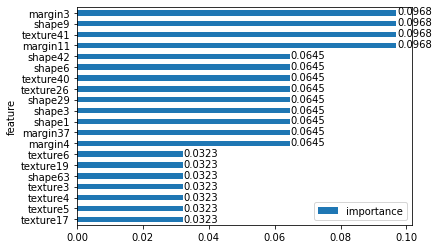

In [159]:
res = PermutationImportance(learn,df_tt.iloc[:1000], bs=64)

In [162]:
res.importance

{'margin1': -0.03225807219154476,
 'margin2': 0.03225807219154476,
 'margin3': 0.09677421657463428,
 'margin4': 0.06451614438308952,
 'margin5': 0.03225807219154476,
 'margin6': 0.03225807219154476,
 'margin7': -0.09677409760569053,
 'margin8': -0.06451614438308952,
 'margin9': -0.03225807219154476,
 'margin10': -0.03225807219154476,
 'margin11': 0.09677421657463428,
 'margin12': 0.0,
 'margin13': 0.0,
 'margin14': -0.09677409760569053,
 'margin15': -0.09677409760569053,
 'margin16': 0.0,
 'margin17': -0.03225807219154476,
 'margin18': -0.06451614438308952,
 'margin19': 0.03225807219154476,
 'margin20': -0.03225807219154476,
 'margin21': -0.09677409760569053,
 'margin22': -0.03225807219154476,
 'margin23': -0.06451614438308952,
 'margin24': -0.09677409760569053,
 'margin25': -0.06451614438308952,
 'margin26': 0.0,
 'margin27': 0.0,
 'margin28': -0.06451614438308952,
 'margin29': -0.03225807219154476,
 'margin30': 0.0,
 'margin31': -0.03225807219154476,
 'margin32': 0.0,
 'margin33': -0

## Custom Pytorch model

### Create DataBlock with FastAI
same as in the previous example

In [69]:
df_tt = df_train.copy()
df_tt.drop(['id'], axis=1, inplace=True)
cont = list(df_tt.columns[1:-1])

In [70]:
to = TabularPandas(df_tt, y_names="species",
    cat_names = None,
    cont_names = cont,
    #procs = Normalize,
    y_block = CategoryBlock(),
    splits = splits,
    )

dls = to.dataloaders(y_block = CategoryBlock())

In [203]:
to.cont_names, to.cat_names

((#192) ['margin1','margin2','margin3','margin4','margin5','margin6','margin7','margin8','margin9','margin10'...],
 (#0) [])

In [208]:
emb_szs = get_emb_sz(to); emb_szs

[]

In [126]:
learn.dls

In [63]:
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

simple_cnn = sequential(
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,32),           #2x2
    conv(32,99, act=False), #1x1
    Flatten(),
)

In [72]:
learn = Learner(dls, simple_cnn, loss_func=F.cross_entropy, metrics=accuracy)

In [73]:
learn.fit_one_cycle(2, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,4.704057,4.653267,0.020202,00:01
1,4.657765,4.563469,0.020202,00:01


In [140]:
learn.fit_one_cycle(5, 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.568419,1.003120,0.348485,00:14
1,1.494028,0.943785,0.318182,00:14
2,1.465132,0.906400,0.318182,00:14
3,1.439820,0.880632,0.313131,00:14
4,1.415471,0.889297,0.308081,00:15


SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=1.3182567499825382e-06)

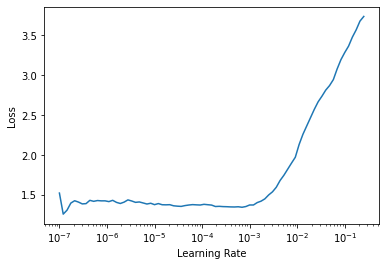

In [141]:
learn.lr_find()

In [142]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.341269,0.823183,0.277778,00:14
1,1.338417,0.983785,0.318182,00:14
2,1.333424,0.885028,0.287879,00:14
3,1.258807,0.767303,0.257576,00:14
4,1.219950,0.734587,0.257576,00:14


In [143]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.169144,1.889390,0.510101,00:14
1,2.061032,6.373356,0.863636,00:14
2,2.480366,3.241277,0.671717,00:14
3,2.446596,1.821882,0.590909,00:14
4,2.297384,1.395924,0.474747,00:14


In [188]:
learn = cnn_learner(dls, resnet18, pretrained=True, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,8.526361,72.083611,0.010101,00:16


In [189]:
learn.fit_one_cycle(5, 0.0001)

epoch,train_loss,valid_loss,accuracy,time
0,8.168875,14.335917,0.085859,00:16
1,8.235692,7.124974,0.146465,00:17
2,8.128841,6.687766,0.161616,00:16
3,8.012637,6.206076,0.186869,00:17
4,7.863090,6.087985,0.181818,00:17
